<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Applied Statistics</center></font></h1>
<h1><center>Common Statistical Tests - Week 3</center></h1>




<center><img src="https://cdn.pixabay.com/photo/2022/03/13/01/33/insurance-7065113__340.png" width="1000" height="600"></center>

<b><h2><center> Titan Insurance Case Study</center></h2></b>

## Problem Statement

### Business Context 

Titan Insurance Company has just installed a new incentive payment scheme for its life policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies but sales always vary in an unpredictable pattern from month to month and it is not clear if the scheme has made a significant difference.

Life insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during a month. For example, suppose salesperson X has, in a month, sold seven policies for which the sums assured were £1000, £2500, £3000, £5000, £10000, £35000. X's output for that month will be the total of these sums assured, £61,500. 

Titan's new scheme is that the sales force receive low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company, but the increase in sales should compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be discontinued after six months.


### Objective

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover and senior executives at Titan Insurance want to understand the effectiveness of the new scheme they introduced. They reached out to the Data Science wing and asked them to conduct the analysis. A random sample of 30 salespersons was taken, their output measured for the penultimate month before the changeover and the fourth month after the changeover (to ensure that the chosen months are not too close to the changeover).

As a member of the Data Science wing, you are assigned the task of analyzing the data and determining whether the new scheme has significantly raised sales outputs. A significance level of 5% has been chosen.


### Data Dictionary

The provided dataset (*TitanInsurance.csv*) contains the following columns:

1. `salesperson_id`: Unique ID of the salesperson
2. `old_scheme`: Monthly output (in 1000 pounds) of the salesperson before the changeover
3. `new_scheme`: Monthly output (in 1000 pounds) of the salesperson after the changeover

## Import the necessary libraries 



In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

## Loading the dataset

In [ ]:
data = pd.read_csv('TitanInsurance.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
# looking at head (5 observations) 
df.head()

,salesperson_id,old_scheme,new_scheme
0,ID_IN085,57,62
1,ID_YH087,103,122
2,ID_CW031,59,54
3,ID_ZO080,75,82
4,ID_NZ038,84,84


* The dataset contains the unique IDs of the salespersons along with their monthly output before (old scheme) and after (new scheme) the changeover of the scheme.

#### Checking the shape of the dataset

In [ ]:
df.shape

(30, 3)

* The dataset contains information about a sample of 30 salespersons

#### Checking the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   salesperson_id  30 non-null     object
 1   old_scheme      30 non-null     int64 
 2   new_scheme      30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


* The `salesperson_id` column is categorical and contains a unique ID of each salesperson
* The columns `old_scheme`, and `new_scheme` are of integer type (numerical)

#### Statistical summary of the dataset

In [ ]:
df.describe()

,old_scheme,new_scheme
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


* Overall, the average monthly output for the sample of 30 salespersons have increased by 5.88% to approximately 72,000 pounds with the change in the scheme. 

* The maximum monthly output from the new scheme is 122,000 pounds, which is 10.91% higher than the maximum output from the old scheme

* The minimum monthly output has also increase by 14.29% 

* With the new scheme, 50% of the salespersons have a monthly output of atleast 74000 pounds, which has increased by 10.45% compared to the old scheme

* It can be seen that there is more variation in the monthly outputs from the new scheme as compared to the old scheme

#### Visualize data

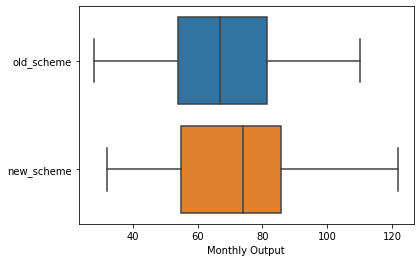

In [ ]:
# visual analysis of the monthly outputs from the old scheme and the new scheme
sns.boxplot(data=df[['old_scheme','new_scheme']],orient='h')
plt.xlabel('Monthly Output')
plt.show()

* The distribution of the outputs for the two schemes are very similar. However, a slight increase can be observed for the new scheme as compared to the old scheme. 
* It can be observed that the median output is higher for the new scheme as compared to the old scheme
* No outliers were observed in the monthly outputs from both the schemes. This suggests that no salesperson performed unsually better or worse than the others
* Is the observed difference significant enough to conclude about the overall impact of the new scheme? To detemine this, we will test the difference using a statistical test.

## Hypothesis Testing

### Step 1: Define null and alternative hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean monthly output from the new scheme is equal to that from the old scheme. <br>
$H_a:$ The mean output from the new scheme is greater than that from the old scheme.

Let $\mu_1$ and $\mu_2$ be the mean output from the new scheme and the mean output from the old scheme respectively.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

This is a case of a one-tailed test for comparing the means from two populations. As we are comparing two means calculated at different times from the same set of people, the two groups become related (dependent). Also, the population standard deviations are unknown. Hence, a two-sample paired t-test is the most appropriate test for this case.

**Two-sample Paired t-test**

In a two-sample paired t-test, we compare the means from two dependent (related) populations to check if they differ significantly. We are provided that the sample is randomly selected.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# create separate variables to store the monthly outputs from the old scheme and the new scheme
output_new_scheme = df['new_scheme']
output_old_scheme = df['old_scheme']

### Step 5: Calculate the p-value

- We will use the `ttest_rel` function from the `scipy.stats` library to perform a two-sample paired t-test.
- The `ttest_rel()` function takes the sample observations from the two groups, and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test. 
    - The sample observations are the monthly outputs of the salespersons with respect to the old and the new scheme
    - As it is a one-tailed test, we will compare the mean output from the new scheme with the old scheme by setting the argument `alternative = 'greater'`

In [ ]:
# import the required function
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value  = ttest_rel(output_new_scheme, output_old_scheme, alternative = 'greater')  
print('The p-value is', p_value)

The p-value is 0.06528776980668831


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06528776980668831 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw Inference

At 5% significance level, we fail to reject the null hypothesis. Hence we do not have enough statistical evidence to say that the mean monthly outcome from the new scheme is greater than that from the old scheme.

## Conclusions

* Overall, the average monthly output for the sample of 30 salespersons have increased by 5.88% to approximately 72,000 pounds with the change in the scheme


* It was observed that there is more variation in the monthly outputs from the new scheme as compared to the old scheme


* Based on the sample data, although it seems that the new scheme has done better than the old scheme in terms of average monthly outcome, there isn't enough statistical evidence to support the same


* As the agreement with the sales force is that the scheme will be discontinued after six months if it does not at least break even for the company, it will be better for the management to wait for another two months before making a decision


* Aggregation of data for a quarter may provide more clarity on the performance than for a single month

___